In [17]:
import streamlit as st
import pandas as pd
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import plotly.graph_objects as go
import numpy as np



In [5]:
# Fetch data using yfinance
retorno = yf.download("AAPL", start='2010-01-01', end= '2019-12-31')
retorno.reset_index(inplace=True)

ma100 = retorno.Close.rolling(100).mean()

ma100

[*********************100%***********************]  1 of 1 completed


0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2510    59.201075
2511    59.401700
2512    59.643125
2513    59.875125
2514    60.106325
Name: Close, Length: 2515, dtype: float64

In [41]:
retorno

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.487532,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.498750,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.395379,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.383555,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.425997,447610800
...,...,...,...,...,...,...,...
2510,2019-12-23,70.132500,71.062500,70.092499,71.000000,69.261597,98572000
2511,2019-12-24,71.172501,71.222504,70.730003,71.067497,69.327454,48478800
2512,2019-12-26,71.205002,72.495003,71.175003,72.477501,70.702927,93121200
2513,2019-12-27,72.779999,73.492500,72.029999,72.449997,70.676086,146266000


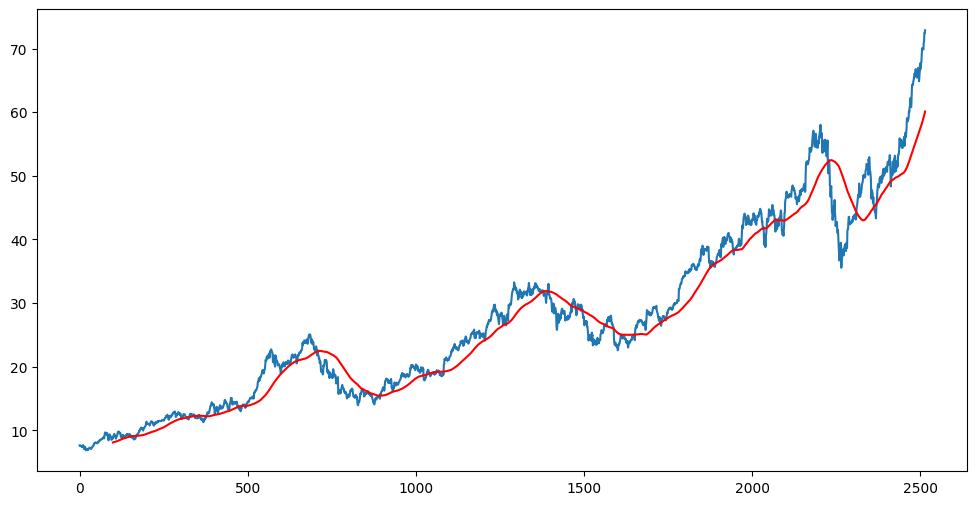

In [6]:
plt.figure(figsize=(12,6))
plt.plot(retorno.Close)
plt.plot(ma100, 'r')

In [7]:
ma200 = retorno.Close.rolling(200).mean()

ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2510    54.132313
2511    54.261513
2512    54.396763
2513    54.529350
2514    54.661100
Name: Close, Length: 2515, dtype: float64

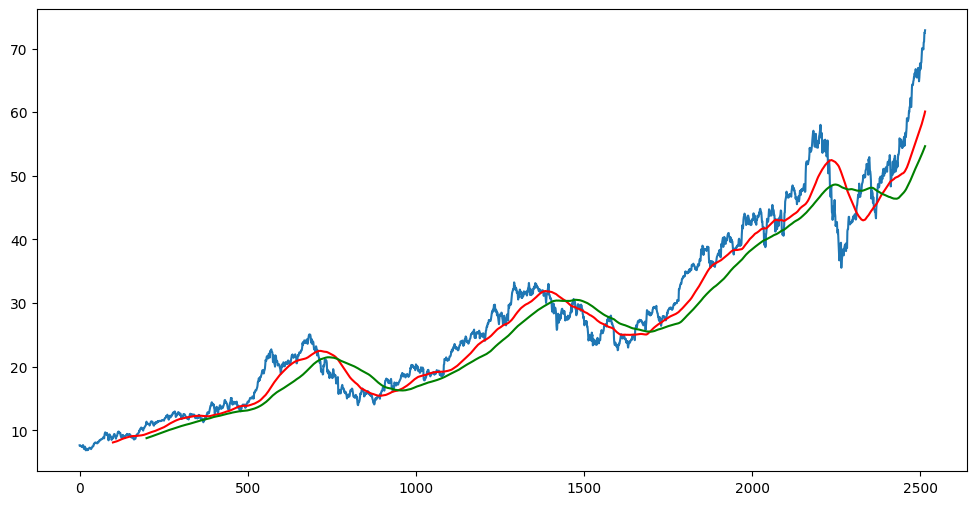

In [8]:
plt.figure(figsize=(12,6))
plt.plot(retorno.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [9]:
data_training = pd.DataFrame(retorno["Close"][0:int(len(retorno)*0.7)])
data_testing = pd.DataFrame(retorno["Close"][int(len(retorno)*0.7): int(len(retorno))])

print(data_training.shape)
print(data_testing.shape)

(1760, 1)
(755, 1)


In [10]:
data_training.head()

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [11]:
data_testing.head()

,Close
1760,29.182501
1761,28.955000
1762,29.037500
1763,29.004999
1764,29.152500


In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [15]:
data_training_array = scaler.fit_transform(data_training)
data_training_array.shape

(1760, 1)

In [19]:
x_train = []
y_train = []

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [20]:
#ML Model

In [24]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [26]:
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_4 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_5 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_5 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_6 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_6 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_7 (LSTM)               (None, 120)              

In [28]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
52/52 [==============================] - 20s 216ms/step - loss: 0.0691
Epoch 2/50
52/52 [==============================] - 13s 248ms/step - loss: 0.0137
Epoch 3/50
52/52 [==============================] - 13s 248ms/step - loss: 0.0130
Epoch 4/50
52/52 [==============================] - 13s 257ms/step - loss: 0.0104
Epoch 5/50
52/52 [==============================] - 12s 238ms/step - loss: 0.0102
Epoch 6/50
52/52 [==============================] - 14s 260ms/step - loss: 0.0094
Epoch 7/50
52/52 [==============================] - 12s 236ms/step - loss: 0.0083
Epoch 8/50
52/52 [==============================] - 13s 244ms/step - loss: 0.0076
Epoch 9/50
52/52 [==============================] - 13s 244ms/step - loss: 0.0078
Epoch 10/50
52/52 [==============================] - 13s 258ms/step - loss: 0.0072
Epoch 11/50
52/52 [==============================] - 12s 234ms/step - loss: 0.0068
Epoch 12/50
52/52 [==============================] - 12s 236ms/step - loss: 0.0068
Epoch 13/50
5

In [29]:
model.save('keras_model.h5')

c:\Users\bruno\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [30]:
past_100_days = data_training.tail(100)
final_df = past_100_days.append(data_testing, ignore_index = True)
final_df.head()

C:\Users\bruno\AppData\Local\Temp\ipykernel_10976\146272867.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing, ignore_index = True)


,Close
0,27.092501
1,27.202499
2,27.000000
3,26.982500
4,27.045000


In [31]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.02781467],
       [0.03015022],
       [0.02585064],
       [0.02547908],
       [0.02680611],
       [0.03370671],
       [0.03317586],
       [0.03232658],
       [0.03158344],
       [0.03306972],
       [0.02855781],
       [0.03036255],
       [0.02600988],
       [0.02356814],
       [0.02022403],
       [0.01958704],
       [0.01523437],
       [0.01576518],
       [0.01910933],
       [0.02441747],
       [0.02425819],
       [0.02776158],
       [0.01268645],
       [0.        ],
       [0.01226183],
       [0.02558522],
       [0.04586231],
       [0.06603324],
       [0.06258295],
       [0.05547006],
       [0.05541697],
       [0.05531082],
       [0.06099053],
       [0.05085197],
       [0.05175434],
       [0.05286905],
       [0.05743405],
       [0.04803866],
       [0.05265676],
       [0.04984341],
       [0.05239133],
       [0.05265676],
       [0.05711557],
       [0.05801795],
       [0.06858117],
       [0.0699082 ],
       [0.07542863],
       [0.073

In [32]:
input_data.shape

(855, 1)

In [33]:
x_test = []
y_test = []

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i,0])

x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(755, 100, 1)
(755,)


In [34]:
#Making Predictions

y_predicted = model.predict(x_test)

24/24 [==============================] - 3s 67ms/step


In [35]:
y_predicted.shape

(755, 1)

In [36]:
y_test

array([0.0721907 , 0.06736028, 0.06911197, 0.06842189, 0.07155371,
       0.07845431, 0.08418707, 0.08482406, 0.08822126, 0.08556719,
       0.08445249, 0.0895483 , 0.0894952 , 0.0883805 , 0.0895483 ,
       0.08997296, 0.08938906, 0.09952758, 0.0998461 , 0.09989915,
       0.09820055, 0.09671427, 0.1359945 , 0.1348267 , 0.1377462 ,
       0.144169  , 0.15075112, 0.15345824, 0.15547536, 0.1538829 ,
       0.16009341, 0.16927655, 0.17187748, 0.17102824, 0.17299223,
       0.17819418, 0.18037053, 0.1772918 , 0.17798189, 0.17941503,
       0.17973358, 0.1945963 , 0.19019062, 0.19454325, 0.19220766,
       0.19316316, 0.19040291, 0.18870427, 0.19114605, 0.19146452,
       0.19034986, 0.19815283, 0.19937368, 0.195658  , 0.20346096,
       0.19486173, 0.20324859, 0.20059453, 0.19910825, 0.20038224,
       0.21588199, 0.21758055, 0.21657199, 0.21513885, 0.21535114,
       0.22103089, 0.21704978, 0.21513885, 0.21344021, 0.21253783,
       0.20436334, 0.20526571, 0.20128461, 0.20542495, 0.20208

In [37]:
y_predicted

array([[0.16110928],
       [0.16169292],
       [0.16227558],
       [0.16283563],
       [0.16335565],
       [0.16382435],
       [0.16424276],
       [0.16462767],
       [0.1650038 ],
       [0.16539791],
       [0.16583069],
       [0.1663101 ],
       [0.16684003],
       [0.16742142],
       [0.1680471 ],
       [0.16870493],
       [0.16938089],
       [0.170059  ],
       [0.17073563],
       [0.17141764],
       [0.17211124],
       [0.17281735],
       [0.17352912],
       [0.1742881 ],
       [0.17516612],
       [0.1762254 ],
       [0.17751743],
       [0.17908043],
       [0.18093222],
       [0.18306637],
       [0.18544874],
       [0.18803212],
       [0.19077452],
       [0.19361311],
       [0.19649738],
       [0.19932592],
       [0.20209536],
       [0.20479894],
       [0.20742139],
       [0.20994239],
       [0.21234237],
       [0.21460406],
       [0.21673976],
       [0.21876366],
       [0.22069643],
       [0.22255516],
       [0.22435082],
       [0.226

In [38]:
scaler.scale_

array([0.02123255])

In [39]:
scale_factor = 1/(scaler.scale_[0])
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

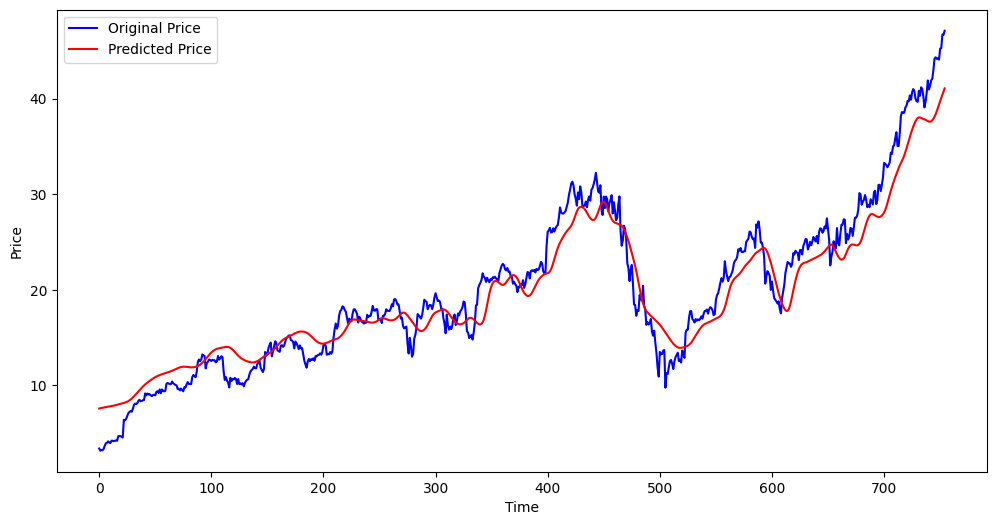

In [40]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label= 'Original Price')
plt.plot(y_predicted, 'r', label= 'Predicted Price')
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()